# **Multiple Linear Regression Model for predicting Highway Miles-Per-Gallon**

Load the Dataset

In [ ]:
import pandas as pd
df=pd.read_csv("cars.csv")
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [ ]:
df.columns

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Hybrid',
       'Engine Information.Number of Forward Gears',
       'Engine Information.Transmission', 'Fuel Information.City mpg',
       'Fuel Information.Fuel Type', 'Fuel Information.Highway mpg',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')

Renaming the columns for better readability

In [ ]:
df.rename(columns={
    'Dimensions.Height': 'Height',
    'Dimensions.Length': 'Length',
    'Dimensions.Width': 'Width',
    'Engine Information.Driveline': 'Driveline',
    'Engine Information.Engine Type': 'Engine_Type',
    'Engine Information.Hybrid': 'Hybrid',
    'Engine Information.Number of Forward Gears': 'Forward_Gears',
    'Engine Information.Transmission': 'Transmission',
    'Fuel Information.City mpg': 'City_MPG',
    'Fuel Information.Fuel Type': 'Fuel_Type',
    'Fuel Information.Highway mpg': 'Highway_MPG',
    'Identification.Classification': 'Classification',
    'Identification.ID': 'ID',
    'Identification.Make': 'Make',
    'Identification.Model Year': 'Model_Year',
    'Identification.Year': 'Year',
    'Engine Information.Engine Statistics.Horsepower': 'Horsepower',
    'Engine Information.Engine Statistics.Torque': 'Torque'
}, inplace=True)



In [ ]:
df.columns

Index(['Height', 'Length', 'Width', 'Driveline', 'Engine_Type', 'Hybrid',
       'Forward_Gears', 'Transmission', 'City_MPG', 'Fuel_Type', 'Highway_MPG',
       'Classification', 'ID', 'Make', 'Model_Year', 'Year', 'Horsepower',
       'Torque'],
      dtype='object')

Removing Duplicates if any

In [ ]:
df=df.drop_duplicates()

Removing unnecessary columns

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Engine_Type', 'Transmission', 'Classification', 'ID', 'Make', 'Model_Year', 'Year'])

# Display the updated DataFrame
df.head()

,Height,Length,Width,Driveline,Hybrid,Forward_Gears,City_MPG,Fuel_Type,Highway_MPG,Horsepower,Torque
0,140,143,202,All-wheel drive,True,6,18,Gasoline,25,250,236
1,140,143,202,Front-wheel drive,True,6,22,Gasoline,28,200,207
2,140,143,202,Front-wheel drive,True,6,21,Gasoline,30,200,207
3,140,143,202,All-wheel drive,True,6,21,Gasoline,28,200,207
5,91,17,62,All-wheel drive,True,6,16,Gasoline,27,265,243


Encoding Driveline and Fuel_Type

In [ ]:
# One-hot encode Driveline and Fuel_Type
df = pd.get_dummies(df, columns=['Driveline', 'Fuel_Type'], drop_first=True)
# Display the transformed DataFrame
print(df.head())

   Height  Length  Width  Hybrid  Forward_Gears  City_MPG  Highway_MPG  \
0     140     143    202    True              6        18           25   
1     140     143    202    True              6        22           28   
2     140     143    202    True              6        21           30   
3     140     143    202    True              6        21           28   
5      91      17     62    True              6        16           27   

   Horsepower  Torque  Driveline_Four-wheel drive  \
0         250     236                       False   
1         200     207                       False   
2         200     207                       False   
3         200     207                       False   
5         265     243                       False   

   Driveline_Front-wheel drive  Driveline_Rear-wheel drive  \
0                        False                       False   
1                         True                       False   
2                         True                    

Encoding Bool values into int values

In [ ]:
df['Hybrid'] = df['Hybrid'].astype(int)
df['Driveline_Four-wheel drive'] = df['Driveline_Four-wheel drive'].astype(int)
df['Driveline_Front-wheel drive'] = df['Driveline_Front-wheel drive'].astype(int)
df['Driveline_Rear-wheel drive'] = df['Driveline_Rear-wheel drive'].astype(int)
df['Fuel_Type_Diesel fuel'] = df['Fuel_Type_Diesel fuel'].astype(int)
df['Fuel_Type_E85'] = df['Fuel_Type_E85'].astype(int)
df['Fuel_Type_Gasoline'] = df['Fuel_Type_Gasoline'].astype(int)
df.head()

,Height,Length,Width,Hybrid,Forward_Gears,City_MPG,Highway_MPG,Horsepower,Torque,Driveline_Four-wheel drive,Driveline_Front-wheel drive,Driveline_Rear-wheel drive,Fuel_Type_Diesel fuel,Fuel_Type_E85,Fuel_Type_Gasoline
0,140,143,202,1,6,18,25,250,236,0,0,0,0,0,1
1,140,143,202,1,6,22,28,200,207,0,1,0,0,0,1
2,140,143,202,1,6,21,30,200,207,0,1,0,0,0,1
3,140,143,202,1,6,21,28,200,207,0,0,0,0,0,1
5,91,17,62,1,6,16,27,265,243,0,0,0,0,0,1



# **Correlation Analysis and VIF score**

Visualizing the Correlation using Heatmap

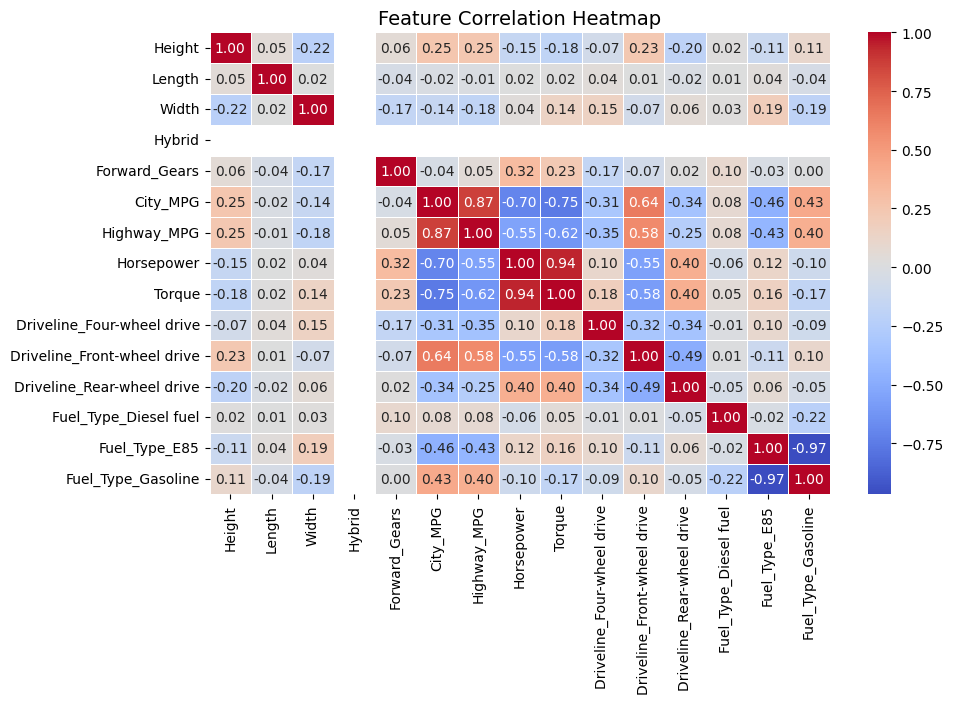

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()


VIF Score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Ensure all data is numeric
X = df.drop(columns=['Highway_MPG'])  # Remove target variable
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
X = X.dropna()  # Drop rows with NaN values
X = X[~X.isin([np.inf, -np.inf]).any(axis=1)]  # Remove infinite values

# Compute VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF scores
print("\nVariance Inflation Factor (VIF) Scores:")
print(vif_data)



Variance Inflation Factor (VIF) Scores:
                        Feature          VIF
0                        Height     1.138121
1                        Length     1.011032
2                         Width     1.212571
3                        Hybrid  2704.299901
4                 Forward_Gears     1.360016
5                      City_MPG     4.501448
6                    Horsepower    11.714051
7                        Torque    13.105443
8    Driveline_Four-wheel drive     2.010481
9   Driveline_Front-wheel drive     2.645816
10   Driveline_Rear-wheel drive     2.262038
11        Fuel_Type_Diesel fuel    14.165207
12                Fuel_Type_E85   209.391625
13           Fuel_Type_Gasoline   219.330322


# **Feature Selection**

Here we
**selected**
1. Height
2. Length
3. Width
4. Forward_Gears
5. Driveline_Four-wheel drive
6. Driveline_Front-wheel drive
7. Driveline_Rear-wheel drive
8. City_MPG

and **Removed**
1. Hybrid
2. Fuel_Type_Diesel fuel
3. Fuel_Type_E85
4. Fuel_Type_Gasoline
5. Horsepower
6. Torque


The selected features have VIF < 5, ensuring low to moderate multicollinearity, except for City_MPG. Height, Length, and Width influence aerodynamics, affecting fuel efficiency, while Forward_Gears improves engine performance. Driveline types impact power distribution, influencing vehicle mileage, and City_MPG serves as a strong predictor of Highway_MPG.

The removed features had VIF > 10, indicating severe multicollinearity, making them unreliable. Fuel type variables were highly correlated, causing redundancy, while Hybrid had an extremely high VIF. Horsepower and Torque were closely linked, making one unnecessary, and their removal allows the model to focus on City_MPG, a more direct predictor of fuel efficiency.

***Model Training and Evaluation***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# Splitting dataset into features (X) and target variable (y)
X = df.drop(columns=['Highway_MPG','Hybrid','Fuel_Type_Diesel fuel','Fuel_Type_E85','Fuel_Type_Gasoline','Horsepower','Torque'])  # Independent variables
y = df['Highway_MPG']                 # Dependent variable (Highway MPG)

# Splitting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the MLR model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display model performance
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)



R² Score: 0.9335
Mean Absolute Error (MAE): 1.15
Mean Squared Error (MSE): 2.33
Root Mean Squared Error (RMSE): 1.53

Model Coefficients:
                       Feature  Coefficient
0                       Height     0.001784
1                       Length     0.000697
2                        Width    -0.003374
3                Forward_Gears     0.511446
4                     City_MPG     1.206289
5   Driveline_Four-wheel drive    -0.693662
6  Driveline_Front-wheel drive     0.681290
7   Driveline_Rear-wheel drive     0.598036


# **Outlier Removal**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Compute the Z-score for each numeric column, but ONLY for the columns used in the model
numeric_cols = ['Height', 'Length', 'Width', 'Forward_Gears', 'City_MPG', 'Driveline_Four-wheel drive', 'Driveline_Front-wheel drive', 'Driveline_Rear-wheel drive']
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Define threshold (3 is commonly used, but you can adjust)
threshold = 3

# Filter the DataFrame to keep only the rows where all values are within the threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]



**Training, Tesing and Evaluation after Outlier Removal**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# Splitting dataset into features (X) and target variable (y)
X = df_no_outliers.drop(columns=['Highway_MPG','Hybrid','Fuel_Type_Diesel fuel','Fuel_Type_E85','Fuel_Type_Gasoline','Horsepower','Torque'])  # Independent variables
y = df_no_outliers['Highway_MPG']                 # Dependent variable (Highway MPG)

# Splitting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the MLR model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display model performance
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)



R² Score: 0.9364
Mean Absolute Error (MAE): 1.15
Mean Squared Error (MSE): 2.14
Root Mean Squared Error (RMSE): 1.46

Model Coefficients:
                       Feature  Coefficient
0                       Height     0.001689
1                       Length     0.000669
2                        Width    -0.003275
3                Forward_Gears     0.512841
4                     City_MPG     1.211172
5   Driveline_Four-wheel drive    -0.725783
6  Driveline_Front-wheel drive     0.705945
7   Driveline_Rear-wheel drive     0.615656


**Model Evaluation Before Outlier Removal:**
1. MAE: 1.15
2. MSE: 2.33
3. RMSE: 1.53
4. R-squared: 0.9335

**Model Evaluation After Outlier Removal:**
1. MAE: 1.15
2. MSE: 2.14
3. RMSE: 1.43
4. R-squared: 0.9364


# **Actual vs Predicted Highway MPG**

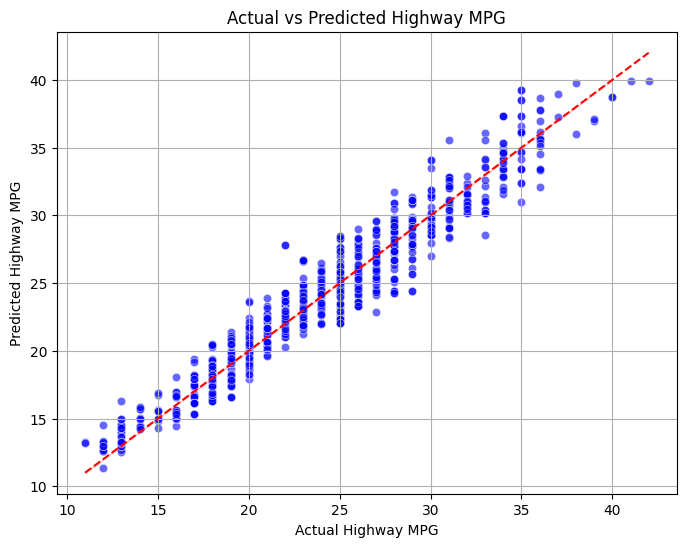

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='dashed')  # Perfect fit line

# Labels and title
plt.xlabel("Actual Highway MPG")
plt.ylabel("Predicted Highway MPG")
plt.title("Actual vs Predicted Highway MPG")
plt.grid(True)

# Show plot
plt.show()
